In [1]:
import pandas as pd

In [11]:
filename = 'data/IMDB_sample.xls'

In [18]:
filename = 'data/IMDB_sample.xls'
df = pd.read_csv(filename,error_bad_lines=False)
df.drop(['Unnamed: 0'],axis=1,inplace=True)

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7501 entries, 0 to 7500
Data columns (total 2 columns):
review    7501 non-null object
label     7501 non-null int64
dtypes: int64(1), object(1)
memory usage: 117.3+ KB


In [21]:
df.head()

,review,label
0,This short spoof can be found on Elite's Mille...,0
1,A singularly unfunny musical comedy that artif...,0
2,"An excellent series, masterfully acted and dir...",1
3,The master of movie spectacle Cecil B. De Mill...,1
4,I was gifted with this movie as it had such a ...,0


In [22]:
df.label.value_counts()

0    3782
1    3719
Name: label, dtype: int64

#percentage

In [23]:
df.label.value_counts()/len(df)

0    0.504199
1    0.495801
Name: label, dtype: float64

## longest review

In [24]:
len_review = df.review.str.len()

In [26]:
max(len_review)

10321

## practise

## How many positive and negative reviews are there?
As a first step in a sentiment analysis task, similar to other data science problems, we might want to explore the dataset in more detail.

You will work with a sample of the IMDB movies reviews. A dataset called movies has been created for you. It is a sample of the data we saw in the slides. Feel free to explore it in the IPython Shell, calling the .head() method, for example.

Be aware that this exercise uses real data, and as such there is always a risk that it may contain profanity or other offensive content (in this exercise, and any following exercises that also use real data).

In [27]:
movies = df.copy()

In [28]:
# Find the number of positive and negative reviews
print('Number of positive and negative reviews: ', movies.label.value_counts())

# Find the proportion of positive and negative reviews
print('Proportion of positive and negative reviews: ', movies.label.value_counts() / len(movies))

Number of positive and negative reviews:  0    3782
1    3719
Name: label, dtype: int64
Proportion of positive and negative reviews:  0    0.504199
1    0.495801
Name: label, dtype: float64


## Longest and shortest reviews
In this exercise, you will continue to work with the movies dataset. You explored how many positive and negative reviews there are. Now your task is to explore the review column in more detail.

In [30]:
length_reviews = movies.review.str.len()

# How long is the longest review
print(min(length_reviews))

52


In [31]:
length_reviews = movies.review.str.len()

# How long is the longest review
print(max(length_reviews))

10321


# Sentiment analysis types and approaches

## levels of granularity

1. Document level
2. Sentence level
3. Aspect level

## Type of sentiment analysis algorithms

- rule/ lexicon-based

- Automatic/ Machine learning




## What is sthe valance of a sentence?

In [32]:
text = 'Today was a good day'

In [34]:
from textblob import TextBlob

In [35]:
my_valance = TextBlob(text)
my_valance.sentiment

Sentiment(polarity=0.7, subjectivity=0.6000000000000001)

## Automated or rule-based?
### Automated/Machine learning
- Rely on having labelled historical data
- Might take a while to train
- Latest machine learning models can be
- quite powerful
### Rule/lexicon-based
- Rely on manually crafted valance scores
- Different words might have different
- polarity in different contexts
- Can be quite fast

## PRactice

In [48]:
two_cities = '''It was the best of times, it was the worst of times,
it was the age of wisdom, it was the age of foolishness,
it was the epoch of belief, it was the epoch of incredulity,
it was the season of Light, it was the season of Darkness,
it was the spring of hope, it was the winter of despair,
we had everything before us, we had nothing before us,
we were all going direct to Heaven, we were all going
direct the other way – in short, the period was so far
like the present period, that some of its noisiest
authorities insisted on its being received, for good
or for evil, in the superlative degree of comparison only.'''

## Detecting the sentiment of Tale of Two Cities
In the video we saw that one type of algorithms for detecting the sentiment are based on a lexicon of predefined words and their corresponding polarity score. Your task in this exercise is to detect the sentiment, including polarity and subjectivity of a given string using such a rule-based approach and the textblob library in Python.

You will work with the two_cities string. It contains the first sentence of Dickens's Tale of Two Cities novel. Feel free to explore it in the Shell.

In [49]:
# Import the required packages
from textblob import TextBlob

# Create a textblob object  
blob_two_cities = TextBlob(two_cities)

# Print out the sentiment 
print(blob_two_cities.sentiment)

Sentiment(polarity=0.022916666666666658, subjectivity=0.5895833333333332)


## Comparing the sentiment of two strings
In this exercise, you will compare the sentiment of two different strings. A string called annak has been defined for you and it contains the first sentence of Anna Karenina. A second string called catcher has been created and it contains the first sentence of The Catcher in the Rye. Feel free to explore both in the IPython Shell.

Your task is again to detect the sentiment of each string - both their polarity and subjectivity. Which one has higher sentiment score? Did you expect that to be the case?

In [51]:
annak = 'Happy families are all alike; every unhappy family is unhappy in its own way'
catcher = "If you really want to hear about it,the first thing you'll probably want to know is where I was born, and what my lousy childhood was like, and how my parents were occupied and all before they had me, and all that David Copperfield kind of crap, but I don't feel like going into it, if you want to know the truth."

In [52]:
# Import the required packages
from textblob import TextBlob

# Create a textblob object 
blob_annak = TextBlob(annak)
blob_catcher = TextBlob(catcher)

# Print out the sentiment   
print('Sentiment of annak: ', blob_annak.sentiment)
print('Sentiment of catcher: ', blob_catcher.sentiment)

Sentiment of annak:  Sentiment(polarity=0.05000000000000002, subjectivity=0.95)
Sentiment of catcher:  Sentiment(polarity=-0.05, subjectivity=0.5466666666666666)


## What is the sentiment of a movie review?
In a previous exercise, you detected the sentiment of the first sentence of the Tale of Two Cities novel by Dickens. Now you will continue to work with the movie reviews dataset. Do you remember how you found the longest and shortest reviews? One of the longest reviews has been imported for you. It is called titanic as it discusses the Titanic movie. Feel free to explore it in the Shell.

Can you calculate the polarity and subjectivity of the titanic string? This review is positive (i.e. has a label of 1). Is the polarity score also positive?

In [54]:
titanic = "Titanic directed by James Cameron presents a fictional love story on the historical setting of the Titanic. The plot is simple, noncomplicated, or not for those who love plots that twist and turn and keep you in suspense. The end of the movie can be figured out within minutes of the start of the film, but the love story is an interesting one, however. Kate Winslett is wonderful as Rose, an aristocratic young lady betrothed by Cal (Billy Zane). Early on the voyage Rose meets Jack (Leonardo DiCaprio), a lower class artist on his way to America after winning his ticket aboard Titanic in a poker game. If he wants something, he goes and gets it unlike the upper class who are so concerned with their social worries. The two fall in love and the audience sees the sinking of the Titanic primarily through their eyes.<br /><br />The movie begins in modern times with the exploration of the wreck by a group searching for treasures, that sunk with the Titanic, which has recently occurred. One of the survivors of the Titanic, Rose DeWitt Bukater, who had heard of the exploration of the wreck on television and is flown to the boat where the search is being led from to tell of what she remembers to help the search. She gets to telling her memory of the one and only voyage of the Titanic. With this, the scene shifts to Southhampton, Ireland where the Titanic set sail from on April 10, 1912 as all the passengers are boarding. After another stop on the Irish coast Titanic went out to see on its maiden voyage across the Atlantic bound for New York. Historically the first few days of the voyage went by uneventful, but the fictional plot of the story is developed during this time as Rose sees the hopeless entrapement of an engagement that she is in to the wealthy Cal Hockley and falls in love with third class passenger, Jack Dawson. Captain Smith alledgedly as shown in the movie was urged by the White Star Line Director to increase the speed of the ship so they would make the newspaper headlines and receive extra publicity by arriving in New York on Thursday night and not on Friday morning as planned. Smith then ordered the fateful decision going against his thirty-two years of experience to stretch the Titanic's legs out to full speed. The Titanic had reports that the waters in the Atlantic they were sailing in were full of icebergs, but they ignored these warnings and proceeded at full speed as shown in the movie. On April 15, 1912 at 11:39, an iceberg was sighted. They attempted to shut off the engines and turn the ship out of the path of the iceberg but there was not enough time and the ship hit the iceberg on the starboard side as depicted in the film. The portrayal of the many small holes in the side of the ship and not one large gash along the side is accurate. The crew of Titanic sent out distress calls and set off distress rockets as shown until 2:18 when the lights finally failed. The lights of the California were spotted six miles away but they failed to realize what was going on and did not respond to Titanic's many pleas for help. The California had tried earlier in the day to warn Titanic of the severe ice that had caused them to stop their trip but Titanic had brushed them off causing the California to turn off its radio and leave the Titanic on its own. The first class women and children were the first as depicted to be put into the twenty lifeboats that were on the ship. Overwhelmingly the third class passengers suffered the most amount of deaths of any class and the crew was hit hard in this tragedy too. The word of White Star Line employees and first class passengers was believed over that of second and third class passengers when authorities were trying to gain information of the sinking. Also, the metal that was used to build the Titanic has been found in recent years under conditions of severe cold, which were experienced the night Titanic sank to be extremely brittle. Overall, the basic plot is very accurate in its portayal of the events and the times at which these events took place on the Titanic.<br /><br />Many of the characters in the story were not real and created simply for the purpose of the movie or as composite characters to represent possible characteristics and ideas of people on the ship. The core group of Rose, Jack, Cal, and Rose's mother all were fictional characters added into the story as they represent different groups of people from the time. Yet many characters such as the Unsinkable Molly Brown; Captain Edward Smith; the ship designer, Thomas Andrew; the White Star Line Representative, Bruce Ismay; and all of the Titanic's officers were real. The maiden voyage was going to be Captain Edward Smith's last voyage anyway as he planned to retire afterwards. He had been a part of the White Star Line since 1880 where he worked his way up to his status as the Millionaire's Captain when the Titanic sunk. The portrayals of the officers is accurate as only four survived the tragedy except for the officer who threatened to kill all of the passengers of the ship with his pistol. He is on record as acting heroicly and was misportrayed to the point that James Cameron apologized and evoked a monument in his honor in the officer's former Canadian hometown. As shown in the movie there was a language problem between the crew and many of the lower-class passengers from non-English speaking nations. In addition, Officer Lowe was the only officer who came back in the lifeboat as depicted. The old people shown in their bed as the water came in their room were based on the Strauss'. Not wanting to leave her husband's side Mrs. Strauss refused to get in her lifeboat and died with her husband on the Titanic. Furthermore, Mr. Goggenheim who was shown sipping his brandy and smoking a cigar reportedly did go out like this dressed in his best. The richest man on the ship, John Jacob Astor, who owned most of Manhattan died nonetheless as well, but his much younger wife was saved in a lifeboat. In addition, Molly Brown was saved and later had medals made up for the crew of the Carpethia that picked the survivors of Titanic up from the water. Her ticket on the Titanic had cost over four-thousand dollars and by the end of her life she ended up broke. All of the interiors of the ship were masterfully replacated down to the last pieces of china and silverware. The gymnasium, which is hardly seen is recreated perfectly with all of the machines reproduced to match those seen in old photographs. The wonderful outfits and costuming were an excellent re-creation of the Post-Victorian era of 1912. The rich at this time practically ruled everything, as the women's suffrage movement had not quite gotten moving yet. Women during this time often married for financial security as Rose was considering doing and normally took a back seast status to their husbands as Cal wished for Rose to do. The rich did not take well to `new money' such as Molly Brown as depicted. Everything of the time was very formal. Women had to be escorted to dinner by a male figure as seen with in the dining scenes. Smoking was not very common among women of the time but holders of cigarettes, which were just coming in at the time were used as seen with Rose in the movie. Men of the time generally smoked cigars not cigarettes. Women were constained physically by their corsets and socially by society. Although James Cameron had no background in historical films he brought in experts of Titanic coupled with two years spent cross-referencing the history of the Titanic and few liberties were taken. The beautiful cinematography and special effects also helped to make the film even more breathtaking.<br /><br />A recognizable message can be seen in the movie Titanic as the people on the ship had about three hours to contemplate their demise. The director, James Cameron, shows the various reactions to this time of crisis in people's lives. Everyone reacts differently and he gets you to think of how you might have reacted had you been in that situation on the Titanic on that fateful night. In addition, this film is a reflection of the 1990's when it was produced as it gives a look into the wreck of the Titanic. Only in the past fifteen years has the site of the actual Titanic been found and explored. This movie was able to give us a deeper look into a disaster that many would not have viewed. However, the moral question of whether people today should be taking treasures from the wreck of an underwater graveyard is posed. There have been attempts to stop treasure seeking missions such as the one portrayed in Titanic but all have failed. As it stands today anyone can make a voyage to the Titanic and take whatever valuables they as portrayed in the film showing the general values of our time on this matter.<br /><br />Technically the film is very well done. To get footage of the wreck at the bottom of the ocean it took twelve dives to get all of the footage needed for the movie. In addition, a special camera had to be created to withstand the intense pressure at the bottom of the ocean. Cameron did not plan on using the probe to go as far inside Titanic as anyone has in the 88 years since the ship sunk but it worked out that this provided an unique perspective into the ship. Furthermore, throughout the film fade ins and outs from the wreck of Titanic to the scene of Titanic during its actual voyage. This shift between the modern scene to the past scene during the voyage works as an excellent transition that makes the story easy to follow in aclear manner. At the very beginning of the movie a septune recreation is used to recreate the scene when the actual people left the European coast on Titanic giving it distinction from the rest of the events of the film.<br /><br />Titanic plays almost like a historical biography and is like a work of art, a true epic. Like most history novels, we know the ending, but it doesn't take away from the wonderful treats that can be found in this picture. Certain aspects of this film are Academy Award material including costuming, sound, cintematography, and editing. If you like interesting characters that will give you an insight into the life of characters in the early 1900's and how they face disaster, then this movie definitely is for you.<br /><br />"

In [55]:
# Import the required packages
from textblob import TextBlob

# Create a textblob object  
blob_titanic = TextBlob(titanic)

# Print out its sentiment  
print(blob_titanic.sentiment)

Sentiment(polarity=0.2024748060772906, subjectivity=0.4518248900857597)


## LEts build a word cloud!

## Why word clouds?
### Pros
- Can revealthe essential
- Provide an overall sense ofthe text
- Easy to grasp and engaging
### Cons
- Sometimes confusing and uninformative
- With larger text, require more work

In [39]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

/home/salas/miniconda3/envs/datacamp/lib/python3.6/site-packages/matplotlib/font_manager.py:232: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  'Matplotlib is building the font cache using fc-list. '


In [47]:
two_cities = '''It was the best of times, it was the worst of times,
it was the age of wisdom, it was the age of foolishness,
it was the epoch of belief, it was the epoch of incredulity,
it was the season of Light, it was the season of Darkness,
it was the spring of hope, it was the winter of despair,
we had everything before us, we had nothing before us,
we were all going direct to Heaven, we were all going
direct the other way – in short, the period was so far
like the present period, that some of its noisiest
authorities insisted on its being received, for good
or for evil, in the superlative degree of comparison only.'''

In [41]:
cloud_two_cities = WordCloud().generate(two_cities)

In [42]:
cloud_two_cities

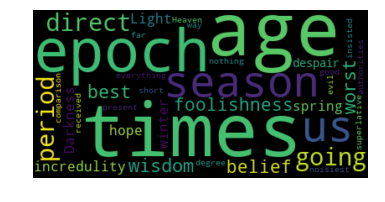

In [46]:
plt.imshow(cloud_two_cities, interpolation='bilinear')
plt.axis('off')
plt.show()

## Practice

In [56]:
east_of_eden ='I remember my childhood names for grasses and secret flowers. I remember where a toad may live and what time the birds awaken in the summer—and what trees and seasons smelled like—how people looked and walked and smelled even. The memory of odors is very rich.'

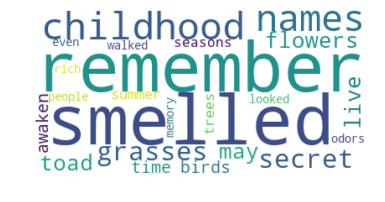

In [59]:
# Generate the word cloud from the east_of_eden string
cloud_east_of_eden = WordCloud(background_color="white").generate(east_of_eden)

# Create a figure of the generated cloud
plt.imshow(cloud_east_of_eden, interpolation='bilinear')  
plt.axis('off')
# Display the figure
plt.show()

## Word Cloud on movie reviews
You have been working with the movie reviews dataset. You have explored the distribution of the reviews and have seen how long the longest and the shortest reviews are. But what do positive and negative reviews talk about?

In this exercise, you will practice building a word cloud of the top 100 positive reviews.

What are the words that pop up? Do they make sense to you?

The string descriptions has been created for you by concatenating the descriptions of the top 100 positive reviews. A movie-specific set of stopwords (very frequent words, such as the, a/an, and, which will not be very informative and we'd like to exclude from the graph) is available as my_stopwords. Recall that the interpolation argument makes the word cloud appear more smoothly.

In [67]:
descriptions = '{rant start} I didn\'t want to believe them at first, but I guess this is what people are talking about when they say South Korean cinema has peaked and may even be going downhill. After the surprisingly fun and moving monster movie "Gwoemul" (aka "The Host") of 2006-- which actually succeeded in making a sharp satire out of a B-movie genre-- successive Korean blockbusters have become more and more generic, even though their budgets (mainly spent on special effects) have become more and more fantastic. Do South Korean movie-makers really want to squander all the audience and investor goodwill, which their industry has built up since the 1999 break-out film "Shiri/Swiri", by making a whole series of big budget mediocre movies like mainland China did? {rant end}<br /><br />The only "reason" I can fathom for making this movie is to dupe the investors into financing the most detailed and fluid digital animation of a Korean/ East Asian-styled dragon I have seen to date, for the final scenes. Now if they had introduced that dragon at the beginning and given it more personality and purpose like in the 1996 "Dragonheart", the movie might have had a few more redeeming qualities other than having lots of digitally animated dragons. Remember "Dungeons & Dragons" in 2000? Hasn\'t anyone learnt that the trick is not how MUCH special effects you use, but how WELL you use it? I hope there are more (and better) Korean legends they can use, because they have just killed a lot of international interest in Korean dragon legends with the way they filmed this one.<br /><br />In short, I agree with all the negative reviews gone before and wonder how Koreans felt about having their folk anthem "Arirang" being played at the very end. As a creature feature, I would have given it at least 5 stars out of 10 if the special effects or action sequences had been worth it, but I\'ve seen many video games with better camera work and scripting (just less dragons). zero day is based of columbine high school massacre. and its a video diary of two boys. at first you don\'t know whats going to happen you think it is just a bad student film. until they start talking about the horrible things they are going to do in this quite school. until they start talking about pipe bombs and guns and going shooting in the woods. they is a lot to say about this movie. all know this film is well a film you forget you watching a film and watching a real video two boys made.<br /><br />the two boys act like they are in a weird cult. they burn all there stuff. like play station games books dvds homework stuff school stuff. these two boys can be anybody your friends you brothers or the people you see walking down the street. it goes through there daily actives (and that is making a gun. in the videos they make it mentions the bullying that happens to them and how people said stuff about there clothes and the things you are into I\'m not saying its right but many people do do things like that.<br /><br />and also the thing is with this people are suspected to like it because of the sensitive topic they have chosen on this film.<br /><br />so thats my review on zero day.<br /><br />and lets just say the end shooting scene is messed up. you have a strong stomach. Holden was actually 55 years old at filming but looked near 70 and he only lived another 8 years. At one point Holden said, "I am over twice your age." Okay, try triple grandpa! The "old enough to be your father" theme they were shooting for didn\'t work. Granted senior citizens sometimes wind up with legal teens. More power to them, but that doesn\'t mean I want to watch it. It\'s not a matter of judgment but the digestive track. I like my food where it belongs. Lenz is fun to watch and the 70s cars, clothes, furniture, etc. make it worth it if it comes on cable late at night and you want to watch something to wind down for bed. It would have been nice to see the blonde friend of Lenz, the one who hocked her guitar, get more scenes. Pleasingly spacey... Who was this chick? I\'m going to try and find out. yes i have a copy of it on VHS uncut in great condition that i transfered to DVD and if anyone one wants to bring back the memories of a Christmas classic please emil me at dmd2222@verizon.net.i searched everywhere and i found nothing on this and i thought that i cant be the only one on this planet that has this classic on tape there has to be other people and if they do i fit in with them being that very very few that has this classic so i consider myself lucky and i have all of the muppets Christmas except one that john denver did with the muppets again i thinks its called a smokey mountain holiday im not to sure but its close. yeah cheap shot i know, but this movie is a great example of how a collection of signifiers of \'deepness\' (political turmoil, love/lust) can be combined haphazardly to great critical acclaim (see also \'american beauty\'). kaufman\'s movie plods along with gratuitous sex scenes interspersed with often painful dialog sequences (in one scene i counted three different \'generic European\' accents affected by the actors) and displays of state might run amok, yet fails to tie them together into the coherent meditation kundera offered. and in its over-long three hours it manages almost completely to gloss over franz,the missing fourth piece in the love triangle that lies at the heart of the plot, and in this manner sacrifices the novel\'s central mechanism of displaying the spectrum of emotions and of power relations that obtain in love affairs. it also fails to even include token screen time for tomas\' son, used in the novel to exemplify some of the political points kundera was making in the novel. combined with the overweening soundtrack, these flaws make this movie\'s three hours unbearably weighty in tone yet light in content. wow! i watched the trailer for this one and though \'nah, this one is not for me\'. i watched my husband and our friend\'s faces during the trailer, and knew this was a \'boy movie\'. i mean, hallo! a bunch of chick barmaids that dance - another striptease?<br /><br />then, i started watching it, it didn\'t look all that bad. so i carried on watching. i watched it right to the end. what an awesome movie. if anything, this is a chick-flick. these girls have attitude. it is really a feel-good movie, and a bit of a love story. really leaves you with a nice feeling.<br /><br />basically, the story of a small-town girl making it big in the city, after going through the usual big-city c**p. there have been a couple of these, it is almost a new urban legend. but it also makes you think of your life, and what you have achieved. well, me anyway. i think it is because the whole working in a bar scenario is very familiar, not just for me, but for many people i know. Don\'t trust the trailers for this one - it is aimed at bringing the men in. where would one start a review of the film Snitch\'d? James Cahill, god rest his soul, made one of the most daring insights into the human psyche since Encino Man. his beautiful story unravels around a drug squad cop McClure, which is a name synonymous with a character from the simpsons who also happens to be an actor! said cop delves deep into the underworld that is high school drug taking, and discovers a gang war to rival that of Police Academy 1, and i mean the one where Jones is racially vilified by his new partner, but manages to come out with some of the funniest sounds you will EVER HEAR.<br /><br />Cahill\'s grasp of effects, both visual and aural is electrifying, the slight pause between action on screen and from the speakers adds to the drama that is snitch\'d, a real gritty like underground thriller. also, kudos to his brilliant use of makeup, such as the supremely convincing burn marks a gang member suffers in his showdown with an indoor barbecue! YUCK! i feel the world of film is much less from James\' passing, his memory will linger on and on and on, reborn with every passing mention of his flagship production, Snitch\'d. his insightful director\'s commentary released a coke-hit up the nose of any discerning film goer, truly appropriate with the harsh reality that is life on the streets, captured in all the beauty of a roughneck punk knocking over a rubbish bin in a brawl.<br /><br />but i ask you, why did the big bosses swimming pool look so cheap? i\'ll tell you why, because thats life in Santa Ana baby, its not all drive bys and hastily constructed principle\'s offices, oh no. there are some folk who must infiltrate the soft, tattooed underbelly of street life in LA to kick their way through in moves that would not seem out of place at a School For Special Children\'s production of Double Dragon: The Play.<br /><br />the only qualm i have with this film, is that there was never a sequel made. come on Steven Spielberg, come on George Lucas, come on guy that made revenge of the nerds 1 through 23, how hard could it be to step it up a notch and pay tribute to this great man, James Cahill.<br /><br />he discovered Eva Longoria you know. oh yeah, that he did.<br /><br />Jonah when my sister said this movie was gonna be good i had second thoughts but i watched it and it was actually funny. basically the movie is made of a weird girl who goes to a small town where no one likes her and she just wants to go there and get the reading of her aunts will don so she can go. but its not all that easy. In this movie you will come across hilarious humor, a witch, a book of spells/recopies, a mentally challenged uncle and a dog. You will understand the meaning of the word freak a after anyways i hope you run right out and try to find this really old movie. hope you like it in total i will have to give it a 0.... no I\'m totally joking ill give it a 9 hope you understand that you will laugh, you will scream and you may just be offended.<br /><br />love yours truly: Dakota you can email me at dakota_loves_it@hot mail.com if you wanna when discussing a movie titled \'snakes on a plane\', we should point out early that the snakes are pretty darn important to the plot.<br /><br />what we have here are very bad cgi snakes that neither look nor move like real snakes. snakes are scary because they appear to be slimy, they crawl they slither. these snakes do nothing of the sort. they glide along like they would in a video game. they are cartoon snakes. i would go as far to say that even someone that had a major phobia against real snakes would not find these ones scary<br /><br />why on earth then would you want to include extreme close ups of these cgi failures? why not rely on suspense.. the whole \'less is more\' ethic. or better still, why not just make them look good in the first place? and then maybe still use them sparingly<br /><br />take one look at john carpenters \'the thing\'. here we have real slime, and gore of eerie proportions. 20 years go by and we get this pile of stinking sfx crap \'snakes on a plane\'. when are these people going to wake up and smell the coffee? special effects are going backwards!<br /><br />sure you could say.. but the movie is a joke, get it? sure i\'m with that idea, but do it well! in addition to the above, this movie has crap dialogue. and the music and sound effects are not creepy or memorable in any way.<br /><br />i could handle every other actor being part of this movie, except for jackson. what was he doing there? the man who starred in pulp fiction 10 years ago. is this career progression? are you offering people value for money? no. i\'d like to know what Tarantino thought when he was half way through this stinker of a movie<br /><br />the current generation seem to have very low expectations. and Hollywood seems to be offering them just what they want. on leaving the cinema i saw a number of advertisements for some truly horrendous looking future releases including... DOA: dead or alive, (another) cgi animal film called \'flushed away\', and another crap looking comedy named \'click\'. in addition to that i saw some awful trailers, including one for (another) crap British horror/comedy. i\'ve truly not seen the movie industry in a mess like this for a long time<br /><br />expect to see this movie for sale in the DVD bargain section for Â£1 in 6 months time. and if you\'re expecting to see a black comedy with tonnes of great looking snakes, and some bad ass cool dialogue coming from samuel l jacksons lips. forget it. what kind of sh*t is this? Power rangers vs Freddy? It was watchable and as good as the first film in the beginning but from the part where the protagonists get super powers in theirs dreams, it started to become childish. This sh*t should have been rated PG or PG-13 rather than R. I expected to see some very mature stuff but it was only for the 1/3 of the film. The rest are for little kids. Plus it\'s focused too much on Christianity. I know Freddy\'s a demon but there are many religions that have different ways to fight demons. Why does it always have to be Christianity? This is total Orientalism and filled with white men/westerner\'s superiority. Don\'t\' watch this, show it to little kids who loves power rangers. well, i said it all in the summary, i simpley adore the movie and the cast...i would give each actor an Oscar...great, great movie...i\'m 25 now and i watched it 4 times in different periods and i always think i won\'t cry and i always do, about 2 or 3 times...;) meryl s. was absolutely brilliant, jeremy irons also..just brilliant...i wish the movie received more awards... i really don\'t know anybody who watched it and didn\'t loved it... also, glenn close was fantastic... the story was beautiful and sad at the same time... i loved the fact that despite everything clara and esteban loved each other so much, and how blanca was close to her parents... well its official. they have just killed American Pie. The first 3 were absolutely hysterical, but this one and the others have been awful. I mean the story is about two college fraternity\'s who battle each other for its houses, I mean come on talk about a weak plot, the first three dealt with growing up, change and marriage, which are all worthy points of development in human society.<br /><br />The new Stifler is the biggest joke, I know its hard trying to compare yourself with the Steven Stifler but so no cigar. I give this movie a 3 because there is 2-3 funny bits in the film.<br /><br />The best character in this movie of course is Jim\'s dad i don\'t know why he keeps continuing to do these poorly developed films. well done giving the perspective of the other side fraulein doktor captures both the cost and the futility of war. excellent acting especially when german high command refuses in the name of chivalry to present medal kaiser ordered struck. the scenes of carnage are probably too intense for effete US minds who\'d probably prefer some silly speeches and senseless abstractions like 14 points or the league of nations. real americans might appreciate the story line and the action. for all the action and intrigue, fraulein doktor compares favo(u)rably to Jacob\'s Ladder. warning:It contains spoilers. If a movie starts with a sex scene then it\'s a bad movie. (see for example 300). This one confirms the above lemma. The second scene constitutes the spinning center of all the action. The fact that we know the end makes the movie boring. Even more, other plots are revealed as the story goes back and forth several times. And this made more frustrated. To compensate the consequent lack of suspense, we learn more and more about how unbalanced are the characters. And oh yes, they have lots to show. Andy (P.Hoffman), for example, is a drug addict, more?, he is cheating his wife, more?, he plans to rob his father, more?, his wife is cheating with his brother, more?, he doesn\'t regret his complicity to his mother\'s death, more?, he is a serial killer, more? etc etc it\'s not enough space to write here... I wonder how could he have a top job. And why his wife didn\'t leave him before. On the other hand I enjoy much the performances of the actor Hoffman.<br /><br />Even here PSH saves what is left from my 7$ spent for this absurdity. Why absurdity? Because it doesn\'t have sense, why should I care for the despicable characters? Another broken lemma is that a movie should have a sympathetic( at least pleasant) character. <br /><br />Also it\'s a lot of sentimentality, for example we are supposed to care for the sufferance of the widowed father without knowing anything about the parents\'lives before the crime. very few chess movies have been made over the last couple of years ,but this one is more than just a chess movie its a story about the need to be loved and the need to win it,John Toturro plays a psychologically challenged man ,nothing matters to him accept 64 squares and 32 pieces ,the game validates him as a person ,when he looses a game he looses the one thing that makes sense to him and John Torturro expresses this in a beautiful fashion,even the love of a woman was not enough to save him from his sad existence.It makes you wonder if there other Luzon\'s out there who obsess about the game,i am sure they are,if you are a chess enthusiast it won\'t hurt to watch it.Its an intelligent piece of work laid out properly and executed well,it achieves its objectives,unfortunately i doubt if there will be sequel. very badly made film, the action/violence scenes are ridiculous.<br /><br />1 point for the presence of Burton and Mastroianni + 1 point for the real tragic event of the massacre of the innocent italians: 2/10. to communicate in film essential things of life - like what is life, does it have a meaning? - is sheer impossible. Of course possible answers to these questions are demonstrated in every film (story), but communication needs a direct appeal to consciousness. This happens if the input from the senses overrules the "input" from our mind, i.e. our thoughts. Few directors know how to communicate essential things. Tarkovsky, is one. His "Stalker" shows images of existence, communicates life as it shows itself and yet escapes your mind. I think De Zee and De Graaff do the same. this was one of the most moving movies i have ever seen. i was about 12 years old when i watched it for the first time and whenever it is on TV i my eyes are glued to it. the acting and plot are amazing. it seems so true to reality and it touches on so many controversial topics. i recommend this movie to anyone interested in a good drama. this was one of the funniest and informative shows that I have ever seen. This is a MUST see for anyone over the age of 16. this show had me and my 2 boys laughing out loud from the beginning. I don\'t know if everything on the show was true but the way it was presented left little doubt that Mr Wuhl was not only very knowledgeable but he also had a blast presenting this information to the very lucky college kids who were in attendance. If Mr Wuhl ever decides to do this format again they will have to rent a building the size of the Georgia Dome to hold all the people who will want to see it. I agree with the idea of making this a HBO series. It would have an amazing following this was a very good movie i wished i could find it in vhs to buy,i really enjoyed this movie i would definaetly recommend this movie to watch i would like to see it again but can never find it in tv, it would be well worth the time to watch it again this was a real guilt pleasure ... i saw the trailer and all the advertising, so i figured \'why not check out this vh1 movie?\' and, as they used to say on t.v., \'i can\'t believe i watched the whole thing!\' quinn and harris were believable beatle boys, and, although the accents were sort of over-the-top and difficult to decipher at times, i found the dialogue believable as well. the film touched upon the tenuous relationship of len/mc and showed how, deep down, they were simply two guys who grew up close together and shared a passion for music - coming at it, though, with different sets of issues and personal needs. you find yourself wishing they\'d hopped in the cab to snl for an impromptu reunion that would have knocked the world\'s socks off, but you also gain a greater appreciation for why they didn\'t this short film trailer is basically about Superman and Batman working together and forming an uneasy alliance.obviously,the two characters have vastly differing views on how to deal with crime and what constitutes punishment.it\'s a lot of fun to see these two iconic characters try to get along.i won\'t go int to the storyline here.but i will get into the acting,which is terrific.everyone is well cast.the two actors playing Superman and Batman are well suited to their characters.the same filmmakers that made Batman: Dead End and Grayson also made this short film.of the three,i probably liked this one the least,but i still thought it was well done.for me,World\'s finest is a 7/10 this movie, i won\'t call it a "film," was basically about nothing and functioned mostly for the popular acts of the time. yeah the war was on full swing (pun intended), and this movie gave the troops and our audiences a treat.<br /><br />but let\'s have something with a bit more substance.<br /><br />loved seeing a young Buddy Rich on the drums. the music was good throughout.<br /><br />but one cameo after another gets old fast.<br /><br />i didn\'t even recognize Zero Mostel! so if you\'re one from the "greatest generation," as they say, you\'ll definitely enjoy this...<br /><br />movie. this movie was so gay like its a mom and son cat that have sex, they also get scared of little kitty cats. they get set on fire by them. the mom cat alien thing kills a guy by stabbing him in the back with an ear of corn? they are bullet proof. invisible. and what not. the star of the movie, Clovis, is the cops cat, Clovis leads the cops to find the mom alien, and after the mom kills the cops, Clovis kills the mom by eating her head then she catches on fire. this movie sucks. it was way way more funny than it was scary, it wasn\'t even scaryt at all. the girl hits the alien on the head with a camera, it knoks him out. she then goes and hugs her. the then grabs her and begins to rape her. once again, Clovis comes to the rescue this movie was just plain dumb i do not think it was scary at all i went in hoping to be shocked and scared but was mostly laughing some of the scenes were just to fake and thrown together blood scenes were extremely over cg and some of the mutants were ridiculously gay looking it also sucked because the acting was just plain horrible u think they could get some good actors and most of the characters i hated just because how stupid and lame they acted even though they were supposed to be in the military i get to watch movies for free and seen many people walking out im guessing because it was so dumb kinda glad i didn\'t have to pay for it in short DUMB ASS MOVIE don\'t see it...but then again thats my opinion this movie was horrible. I could barely stay awake through it. I would never see this movie again if I were payed to. The so-called horror scenes in it were increadably predictable and over played. There was really nothing about this movie that would have made it original or worth the $7.50 I payed to see it. Don\'t go see it, don\'t rent it, don\'t read about it online because any of these things would be a complete waste of your time. Sarah Michelle Geller gave a lackluster performance and really should be ashamed of herself for sullying her good name with this movie. Shame on you Sarah for being associated with this horrible, horrible movie. Horrible movie, no need to ever see it. this movie was banned in england? why? tom savini, george romero, dario argento, lucio fulci and others had done far worse before and have continued to so since...<br /><br />this movie has all the basic elements of a decent 70s or early 80\'s horror film. good looking girls (who can\'t act to save their lives, by the way), a terrible lightning storm with a torrential downpour, a scythe, a crazy brother wandering around the family estate, and actually a pretty damn good twist at the end. but banned? seriously. when the English parliament banned this movie, the italians probably laughed their collective asses off at how backwards and prudish the brits really were.<br /><br />there was maybe two minutes of total screen time devoted to the violence and gore (which was greatly underdone). there was nudity but no sex although allusions to sex were made, obviously. but absolutely nothing worthy of being banned.<br /><br />i would like to see what could have been done if the filmmakers had a decent budget to work with. as it stands, the film is entertaining, but the lack of picture and sound quality take away from the end result.<br /><br />banned... what a joke... this movie scared me so bad, i am easily scared though so its no big thing but this movie was scary and whoever wasnt scared by this movie, im surprised because everyone i know said it was scary, i hope everyone sees it, but dont see it with the lights off like i did.... this movie let me down decidedly hard. it was a great concept that was ruined with a horrible script. The story just didn\'t flow and was disjointed at best. There were so many elements to this story that were not explained, or were forced into place with out any real thought. elements like the love story could have been expanded on a bit more, and the cannons need to be written in better. the whole main character growing up thing needed more about the training he was receiving and less standing around. everyone likes a good "little guy overcomes" story and this showed promise but with the scripting failures wasn\'t to be. While it did have some pyrotechnics in the final battle sequence it was lackluster due to a lack of choreography. this made for a maddeningly boring watch<br /><br />it could have been so good :( this movie is not porn, it was not meant to be porn, and unless my uncle runs for president of the world it should never be considered porn.<br /><br />now that that issue was sorted out, i can say i thoroughly recommend this film, as it\'s issues are still widely available. it\'s funny, the acting is great and it raises serious(curious) questions.<br /><br />i can\'t fully understand why this film was so mistreated, probably this is why i plan to never visit the us. Lena is the true pioneer of the modern riot-grrrl movement, confusion, curiosity and wit are her main attributes, she is occasionally angry, but aren\'t we all? this movie is made for Asian/Chinese market, targeting particularly fans of Jay Chou, one of the biggest music star in Asian.<br /><br />Jay Chou is a very talented song writer/singer. He is mediocre as an actor, although he did appear in several big-budget productions ("initial D", "Curse of the Golden Flower "). Amazingly, he won both golden horse (taiwan) and Hong Kong film awards for "initial D".<br /><br />The supporting cast are very well chosen, which appeals basically everyone from China. The cast including many famous movie/TV actors, singers, even sport commentator (Huang Jianxiang from China). However, they were not given enough time to show their talents.<br /><br />The biggest mistake is that Chu took over both director and writer position. He has a reputation of making shallow and brainless movies based off non-coherent scripts. With his poor directing and lam story, the whole talented cast, fancy vision effects and tones of production money was wasted.<br /><br />However, the terrible movie successfully cashed in over 10 million dollars, maybe even more in Asian, which made this one of the biggest box office success in Asian.<br /><br />The bottom line is: you can watch this movie only if you want to see how money and talents are wasted, or if you are simply accompanying your kids who are fans of Jay Chou. this movie is awesome. sort of. it dosent really say much, or do much, but it is an awesome movie to watch because of how stupid it is. the high school is taken over by evil ms.togar that hates the one thing that all the students love, rock& roll. riff randle get everyone tickets for the ramones show, and this movie peaks with a take over of the school led my riff randle & the ramones. this movie has everything, a bad script, questionable directing, bad actors(ie clint howard & p.j. soles), an awesome soundtrack,extreme campyness, these elements & much more come together to make this what it is,a classic.<br /><br />note - during the live ramones set, notice that darby crash of the germs is in the front of the crowd. neat-o. this movie has no plot, no character development, and no budget. it really sucks to put it in short terms. Since there is no development for the movie, it really can\'t even be looked as trying to be artistic or trying to make a statement against torture. Which leaves two other reasons to possibly watch it. To be shocked or to get off on it like a sick little freak. Well it falls short here too. The girl\'s reactions just seem dumb. it\'s extremely easy to tell that it\'s fake (honestly professional wrestling looks more realistic than the crap they try to get by with in this movie. They throw innards on her, but she\'s asleep for most of it, so it\'s just kinda dumb. The only really kind of worthwhile part is the end when they quickly cut from scene to scene just before the needle goes into her eye. But honestly the girl is extremely ugly and everything is incredibly fake, with the exception of the eye. if you want a good movie about torture, go watch Hostel and Hostel 2. Not only do they both contain realistic violence, but there is also an actual storyline that draws you in and makes you care about the people. Plus the tow movies really work on a deeper level considering themes like American fears of foreigners, issues of morality, testing how far a person can go, human instincts vs. civilization, and many other things. Plus they are carefully written and contain some good humor when the story isn\'t focused on the violence. These are much better choices over this piece of crap this movie has lot of downsides and thats all i could see. it is painfully long and awfully directed. i could see whole audience getting impatient and waiting for it to end. run time is way over 3 hrs which could have been edited to less then 2 hrs.<br /><br />transition between stories is average. most people confessed being on seating expecting something better to come out.<br /><br />its funny only in pockets. ambitious project and a below par execution. govinda does a fair job, anil kapoor disappointed me, rest we as expected. if u r expecting anything close to babel or love actually then its no where close. this movie begins with an ordinary funeral... and it insists so hard on this ordinary funeral feel that i lost interest within 5 minutes of watching, and started skipping scenes. it seems to me whomever made this movie is afflicted to the extent of becoming trapped in a permanent morbid trance, unable to contemplate anything else but death and destruction. well, i ain\'t one of the dark kids from Southpark, i want a movie that within 10 minutes gets me well into an interesting story, i won\'t sit and watch 10 minutes of nothing but preparations for a funeral.. my grandma on her last years was fascinated by funerals, perhaps she might have enjoyed this "movie". this is what you would get if you allowed a 10 year old (manic American) to write a story of a moon trip. Absolute garbage with no redeeming qualities Maybe it held some fascination in the 3D dept. but as a narrative and entertaining animation it held nothing to make wasting an hour and a half worth while. Save your time and money and watch BOLT instead<br /><br />Damn. Not enough lines, yet I feel that sums it up... well, I agree with an above review - this is like a cold-war propaganda story. Maybe it would have been more interesting if they had made it about the flies uncovering the hoax of the moon landing, or if the flies had died in the first minute. BTW - why were all the main character flies deformed? - not one had the full compliment of limbs! this is the worst movie i\'ve ever seen. i\'m not kidding. the next time it comes on, i will just continually run my head into a wall. it would me more enjoyable to sit in an emergency room trying to explain to a doctor why my brain is swollen than attempting to make it through this movie again.<br /><br />i hope that black and stiller never work together on a project this bad again. they are both good comedians, so i was shocked this was so awkward.<br /><br />if they had to do it all over again, i\'m pretty sure that they would decide to not do it. the folks that fronted the money, must have lost a ton. not really- because the special effects (all 2 of them) were terrible. this is the first time I\'m writing a comment on a movie on IMDb. but i had to write it for this one. its 3 hrs of unadulterated torture. from the starting u get the idea that the movie is gonna be bad. the acting is pathetic. I\'m a big fan of Ajay devgan (loved him in bhagat singh) but he is at his worst in this movie. amitabh seems to have worked hard for this one, but somehow the fear is missing. prashant raj is a non actor. and the most irritating part of the movie is nisha kothari. i have no clue why the director took her in this movie. the background score is repetitive. somehow i felt that ramu tried to repeat a sarkar, the color theme, the background score, the camera angles, but it didn\'t work. PLEASE Don\'t WATCH IT this is really films outside (not in a motel room). With real costumes (not only strings and swimsuits). You have to see this movie. it\'s the only porn movie I know that is worth watching between the sex scenes.<br /><br />Bon Cinema<br /><br />Laurent this is one of the funniest shows i have ever seen. it is really refreshing to watch and i was in stitches many times. i guess there is a social awareness factor to this too which makes it quite interesting. if these were white girls would they get the same reaction? maybe they would, maybe they wouldn\'t? the characters know no limits (check my lyrics) and do not exclude anyone from their twisted sense of fun!There are so many funny sketches. my favorites is the bob the builder one. it\'s so silly it\'s genius. if you like twisted black comedy then this is for you. if you like keeping up appearances it probably isn\'t.3 non blonde\'s is yet another hilarious British BBC comedy shown on TV! It is such a funny show and the characters unleashed on the unsuspecting public are laugh at loud funny! It would be impossible to keep a straight face watching the crazy characters and the reactions of the public! This series easily adds to the excellent comedies being produced! this is best comedy i ever seen! but not all can understand this you must be from Georgia to understand this amazing movie! :) overall one of best film i ever seen......... Vachtangi(Benjamin) and all supporting actors playing very very good but acting of Kote Daoshvili (Father Germogel) is for my opinion best acting in supporting role in history of films :)) in this movie playing many georgian stars like ipolite xvichia,sergo Zakariadze,sofiko chiaureli,verikoan djafaridze,Sesilia Takaishvili,Dodo Abashidze.... they all are Stars in Georgian cinematography :) plus in this movie is playing great Russian star Evgeni Leonov and of course Director of the film Georgy Danelia is one of the best...... i recommending this movie for everyone but remember you must know good Russian language to watch this movie this is a piece of s--t!! this looks worse than a made for t.v. movie. and i shutter to think that a sequel was even concieved and the results... war is prettier than this. jean claude van shame has done it again and he wonders why his career is where it is now. no script, no story and no time should be wasted on this. i mean that. 1 out of 10 is too high, way too high. goldberg should be jackhammered for this. van shame is no actor. this is a great movie. I love the series on tv and so I loved the movie. One of the best things in the movie is that Helga finally admits her deepest darkest secret to Arnold!!! that was great. i loved it it was pretty funny too. It\'s a great movie! Doy!!! this is a film about life, the triumph over adversity and the wonders of the human spirit. I defy anyone not to shed a tear by the end of the movie. This is more than just a tear-jerker, its an engaging, thought-provoking drama with excellent performances from all the cast but especially derek Luke and denzel washington. 7 years on, I\'m amazed that Luke is still a virtual unknown and washington only directed one other film. Nevertheless, apart from a slow build-up, the story of this foster child\'s trials and tribulations and how it still affects him in adulthood is the sort of movie that stays with you long after you have seen it. Like many fox searchlight pictures, this was more of a sleeper hit and didn\'t get the mass critical acclaim it deserves. The scene where Antwone finally meets his mother summed up the movie for me, there were so many ways that could have been done and it could have been all schmaltzy or it could have been unrealistic but Washington struck exactly the right tone, his mother never said a word and could only shed a tear, while antowne asked simply why. Her overwhelming guilt prevented her from saying anything, what could she say to defend herself? One of the most moving cinematic scenes I have seen. this independent film was one of the best films at the tall grass film festival that i have ever seen there i loved it there are so many things that was great about the film on top of all that the cast and crew that i had the opportunity to meet were absolutely phenomenal.I thought that Avi did a great job in his role. and Ricky Ullman was absolutely true to his role for a Disney actor i was amazed at his talent to be able to go from cheesy teen comedy to such an adult role with no problems the talent in the film was just amazing the cinematography was just great if you want to see an independent film this is one really that you should see.I think that Mr Gruver would have been so proud to have such a submission in his festival and his parents loved the movie so much when it won the audience favorite they went and saw it again. this truly was a great film it was dark and funny and sad and truly emotional it was just fabulous. I am honestly just so enthused by this film and i really don\'t want to spoil it for any one just see it and truly be amazed at it i think that these film makers really have what it takes to go places and I hope to see more work from them in the future. this film was just brilliant,casting,location scenery,story,direction,everyone\'s really suited the part they played,and you could just imagine being there,Robert Redford\'s is an amazing actor and now the same being director,Norman\'s father came from the same Scottish island as myself,so i loved the fact there was a real connection with this film,the witty remarks throughout the film were great,it was just brilliant,so much that i bought the film as soon as it was released for retail and would recommend it to everyone to watch,and the fly-fishing was amazing,really cried at the end it was so sad,and you know what they say if you cry at a film it must have been good,and this definitely was, also congratulations to the two little boy\'s that played the part\'s of Norman and Paul they were just brilliant,children are often left out of the praising list i think, because the stars that play them all grown up are such a big profile for the whole film,but these children are amazing and should be praised for what they have done, don\'t you think? the whole story was so lovely because it was true and was someone\'s life after all that was shared with us all. this film takes you inside itself in the early minutes and holds you till the end. it has a very humane story and very good selected music. The acting of Moritz Bleibtreu (Giancarlo Amato) and Barnaby Metschurat (Gigi Amato) is satisfying. Recommended to people who get bored of action films and want to see a good movie. this film is terrible. The characters are completely unbelievable, and wildly inconsistent. The plot is awful and some of the classroom scenes are cringe-worthy and make for uncomfortable viewing.<br /><br />In fact the quality of the script and characterisation would suggest that this film was written by high school students, only the utter lack of credibility to the school environment would suggest that, in fact, the writers probably never went to high school. The acting in most cases was weak too, although a lot of this was down to a poor script and plot, i am not sure that any actors could have made this film watchable.<br /><br />having said that the sound track was OK, and the cinematography was nice in places (although the editing was poor). this film is quite simply one of the worst films ever made and is a damning indictment on not only the British film industry but the talentless hacks at work today. Not only did the film get mainstream distribution it also features a good cast of British actors, so what went wrong? i don\'t know and simply i don\'t care enough to engage with the debate because the film was so terrible it deserves no thought at all. be warned and stay the hell away from this rubbish. but apparently i need to write ten lines of text in this review so i might as well detail the plot. A nob of a man is setup by his evil friend and co-worker out of his father\'s company and thus leads to an encounter with the Russian mafia and dodgy accents and stupid, very stupid plot twists/devices. i should have asked for my money back but was perhaps still in shock from the experience. if you want a good crime film watch the usual suspects or the godfather, what about lock, stock.... thats the peak of the contemporary British crime film..... this by far one of the worst movies I have ever seen in my life. I gave up to watch it after an hour and regretted that hour a lot. the acting is horrible and there is almost no plot. my guess is that someone came up with a strange shape of an animal and started to make a story around of it. borrowing some ideas from movies like Resident Evil and Aliens doesn\'t result in a movie like them. if this going to be a top Korean movie, I\'d rather won\'t bother to see even a Korean movie trailer...<br /><br />By the way, this movies is a good reason to believe that not necessarily a high rating means the movie is promising. I think every Korean who has internet for online gaming rated this movie over the 8, even though has no clue what it is about. this animated Inspector Gadget movie is pretty lame.the story is very weak,and there is little action.most of the characters are given little to nothing to do.the movie is mildly entertaining at best,but really doesn\'t go any where and is pointless.it\'s watchable but only just and is nowhere near the calibre of the animated TV show from the 80\'s.it\'s not a movie that bears repeat viewing,at least in my mind.it\'s only about 74 minutes long including credits,so i guess that\'s a good thing.unlike in the TV show,the characters are not worth rooting for here.in the show,you wanted Inspector Gadget to save the day,but there,who really cares?anyway,that\'s just my opinion.for me Inspector Gadget\'s Last Case is a disappointing 3/10 they have sex with melons in Asia.<br /><br />okay. first, i doubted that, but after seeing the wayward cloud, i changed my mind and was finally convinced that they have sex with watermelons, with people dead or alive. no safe sex of course. the (terrifyingly ugly) leading man shoots it all into the lady\'s mouth after he did the dead lady. never heard of HIV? guess not.<br /><br />the rest of this movie is mainly boring, but also incredibly revolting. as a matter of fact, in parts it got so disgusting i couldn\'t take my virgin eyes off. sex with dead people! how gross is that? and what\'s the message behind it all? we need water, we need melons, we need to be dead to have sex? sorry, but this stinks! there should be a sub-genre in the Western called \'the Robert Mitchum Western\'. Mitchum\'s brilliant, idiosyncratic, usually undervalued Westerns import his film noir persona to etch some compellingly dark character sketches, and bring an elegiac world-weariness more familiar from the films of Sam Peckinpah. \'Man with the gun\' is one of his best. Directed by Orson Welles protege Richard Wilson, it is a stark, monochrome beauty, full of chilling silhouettes and terrifying outbursts of savage violence, as Mitchum comes to tame a town terrorised by a monopolist with a private army. Mitchum\'s regression from soft-spoken stranger to deranged murderer, with a host of dark emotions in between, is a marvel of expressive, physical acting. there are three kinds of bad films - the cheap, the boring, and the tasteless. the only really bad movies are boring and tasteless. <br /><br />boring films are just, well, boring - if you don\'t leave quickly enough, you fall asleep.<br /><br />tasteless films actually have their defenders; but the fact remains that they are masturbatory aids for very sick people.<br /><br />only the cheap bad films are really funny, because the filmmakers wanted to make their films so desperately, they way-over-reached beyond their abilities and available resources.<br /><br />Bo Derek is just naturally boring and tasteless; fortunately, fate and a lack of funds and skill redeem her by making her seem cheap as well. this film is hilarious and it may well be the last really funny-bad film ever made.<br /><br />i first saw this in a theater, may god forgive me; i was laughing so hard i was rolling off my seat, and so too with most of the rest of the audience.<br /><br />it\'s clear that Derek and her husband-promoter, conceived of this film as, partly, a satire; unfortunately, the dereks clearly lacked any of the necessary resources to pull that off; consequently, the \'satirical\' element comes off as some school-girl\'s impression of some gay young man\'s impression of frank gorshin\'s impression of the riddler in batman trying to pretend he\'s robin - it doesn\'t fly over our heads, it has no clue where any human head might be.<br /><br />on the other hand, there are some supposedly serious moments in this film - it is supposed to be an action film, remember - that are so astoundingly cheesy, one wonders if someone squirted spoiled milk in one\'s eye.<br /><br />as for Derek\'s infamous tendency to reveal her breasts - i can\'t imagine a less erotic nudity photographic display, she is so weird looking with those broad shoulders, i can\'t imagine what any one ever saw in her.<br /><br />as for the plot - such as it is - well, it isn\'t; Derek chases around Africa, and god alone knows why. then her father - Harris - pretends to act in some maniacal puppet-show, and then of course there\'s the hunk\'o\'Tarzan that seems to have wondered in from advertisement without knowing that the subject\'s changed - probably because he hasn\'t seen a script - apparently no one has.<br /><br />negligible camera work, shoddy editing - if it weren\'t for the 3-way with the chimp, the film would be unbearable -<br /><br />as it is, it\'s a real hoot. there are those movies that are bad they are funny, then there are those where you scream "i want that one and a half hours of my life back"...thats pretty much what this is.<br /><br />dean cain tries to be an actor but fails. the sfx are really bad (repeated scenes and rocks that look like falling paper) and the fake plastic guns that have torches taped on them...the split screen effect used to show multiple things happening at once is just terrible.<br /><br />this movie cant even be used as one of those simple night entertainers, its just that bad<br /><br />if i could go negative ratings, i would the only enjoyable thing about this highly mockable movie is playing "guess" that location. What Toronto landmark will stand in for what American/international location.<br /><br />who knew that the anti-christ would be russian? obviously he can\'t be american since we need the yanks to save the day - oh Buck... you\'ll tell us all the truth... you\'ll show us the light... and the way outta the building should those nasty anti-christers get their way.<br /><br />Five golden raspberries. Faith is not enough to hope they don\'t make another of this ilk! We don\'t gotta prayer. the movie opens with a beautiful lady in a tattered white gown running through a stereotypical eastern european town. we know she\'s being followed by something, because she keeps looking behind her. and soon we see she\'s being chased by a mysterious man in a black trenchcoat. then we realize that the man is actually the vampire hunter and he is after her. but look is that her reflection in the store window??? no its just her identical twin vampire! but unfortunately they both get it.<br /><br />after this brilliant and amazingly fun throwback to the old hammer films of the 60\'s and 70\'s (in the credits the twins are listed as the twins of evil, which of course is the name of the final instalment in hammer\'s karnstein trilogy), the plot pretty much dies.<br /><br />What little plot there is involves dracula (who conveniently changes his appearance each time he is reborn, so the producer doesn\'t have to rehire the same dracula) coming to a morgue, the med students realizing he\'s undead and thinking....wow what an opportunity, maybe i\'ll just disregard all those movies that say that drinking vampire blood turns you into a vampire and use the vampire\'s blood to find a cure for our jerk friend\'s ailment. obviously this is a mistake and everyone becomes a vampire.<br /><br />A new concept but pulled off excruciatingly badly. The movie keeps setting up wonderful situations and refuses to do anything with them.<br /><br />For example the med students attempt to bring drac back to life by placing him in a bathtub filled with blood in a secluded run down country mansion. The house itself is scary enough to be the center of the film, but do we stay there? no because they decide to take the vampire to an abandoned swimming pool. sigh. This movie has a real problem with "homages" as i mentioned before the opening scene is straight out of hammer, and this house scene would have been perfect for a hammer-like movie, but the movie rapidly switches gears and changes to a medical horror.<br /><br />The other problem is that they introduce so many characters it is almost impossible to feel sorry for any of them. There are the med students and their wheelchair bound professor-type "friend" the med students are all: arrogant, boring, money hungry, and stupid. how they made it to med school at all amazes me, unless the med school had to meet its muscle bound hunk/big breast quota. and then there is the vampire hunter who remains mysterious through the movie. hey i can respect that but it would be nice if they didn\'t set it up like the movie would be about him. then you have random priests, cops, and science types. so many people are introduced and then quickly forgotten about until they need that person to either save the day or jump out for a cheap scare that it becomes quickly tedious.<br /><br />Basically this is a lazy movie. no real scares, just a few predictable jump scares. The set up for these is so elaborate it is hilarious. for examp le the bathtub full of blood. it is so obvious that drac is going to pop out of the murky blood. and yet we have to wait far too long to get to the inevitable jump scare. after this he kills one of the dumber and larger breasted med students. we all know she\'s going to become one of the undead. but what do the others do? bury her in a shallow grave near the house. sigh, so you know who will jump out at you when the cops show up at the house..........<br /><br />Oh well.<br /><br />Maybe someone will get the hint that it is impossible to make a scary vampire movie and just go for atmospheric, and then we will end up with an entire movie that is as good as the opening scene.<br /><br /> the first Scanners may not have been a great movie,but at least it was original.there is no such novelty to this one.the acting is worse,in my opinion,and the story is slower and nothing special.i also didn\'t like the dialogue.and the special effects are no better than in the original.this is movie is inferior to the first one in all ways.the only thing different about it,is that it is loud and chaotic at times.but that doesn\'t make a good movie.if they had done something better with the story and made it interesting,this could have been a decent movie.i actually couldn\'t get through it all without fast forwarding through it.to me,this is a forgettable movie,and not much more.despite all that,there are worse movies.being in a generous mood,i\'ll give Scanners 2 a 4/10. the characters at depth-less rip offs. you\'ve seen all the characters in other movies, i promise. the script tries to be edgy and obnoxious but fails miserably. it throws in some hangover meets superbad comedy but the jokes are way out of left field, completely forced, and are disreguarded almost completely after they are cracked. the hot chick is old and has no personality, shes just some early thirties blonde chick with a few wise ass non-underwear wearing jokes who is less than endearing. the attraction between Molly (the hot chick) and Kirk (the dorky love interest) is barely communicated. the attraction in no where to be found its a completely platonic relationship until they awkward and predictable seat belt- mishap kiss occurs. afer this they are in a full on relationship and its just incredibly lame. the main focus of this movie is not the relationship, but a failed attempt at making a raunchy super-bad-esquire movie with a semi appealing plot. I could compare this to the hangover, in its forced nature. i wont get into that. i could keep going but its just pointless. just don\'t pay to see this movie. the author of the book, by the same title, should not have let her name be used for this movie. if you have read the book, this movie takes such a liberal interpretation of the actual events in the book and its spirit that the movie and book seem to have quite little in common except the title and some superficial details. the movie adds nothing, in terms of artistic merit, to the book\'s own literary achievement.<br /><br />for those who have not read the book: you will also be disappointed. not only does the plot move at an incredibly slow pace, it doesn\'t offer anything more while it is moving slowly (like character development, for example). some viewers might be entertained by some of the graphic lesbian love scenes later on in the movie, but you might as well watch a showtime special for the stuff they show in therese and isabelle--its fairly tame and not imaginative at all. that kid a is such a babe; this movie was no Titan A.E.(of which it is in many ways modeled after) but still came off as entertaining, the fact this lost to a piece of monkey crap like Tomb raider makes wanna cry; includes some of the most entertaining characters i\'ve seen in disney film terribly underrated with matt dillon and tom skerritt, good backdrop for solid story and some memorable lines, well acted and well cast, tommy lee jones and bruce dern make you hate them with passion somewhere i\'d read that this film is supposed to be a comedy. after seeing it, i\'d call it anything but. the point of this movie eludes me. the dialogue is all extremely superficial and absurd, many of the sets seemed to be afterthoughts, and despite all the nudity and implied sexual content, there\'s nothing erotic about this film...all leaving me to wonder just what the heck this thing is about! the title premise could have been the basis for a fun (if politically incorrect) comedy. instead, we\'re treated to cheap, amateurish, unfinished sketches and depravity and weirdness for its own sake. if i want that, i\'ll go buy a grace jones cd. so, being a fairly deep fan of horror movies, it\'s been a while since i\'ve seen one that really made me jump (or fidget nervously.)<br /><br />definitely going to get this on DVD when it comes out... a hell of a lot better than the ring. the thing that i don\'t get is that so many people that we talkd with after the movie thought that it was horrible, well, if that\'s what you think, then so be it... i know what i liked and it takes a fair amount to get me to actually feel scared, so i have to say that this one is worth watching.<br /><br />now, you might be disappointed in the story if you need everything in a neat and tidy line, because the plot goes back an forth a little bit to help build the story (i think that if it was shown in chronological order, it would have ruined the whole thing.)<br /><br />i\'m actually glad that this movie had very little bloody messes in it... maybe the rest of you studio writers and whathaveyous will realize that you don\'t have to splash the red stuff all over the set to make people afraid. shakespeare\'s plays have a way of transcending time. The language somehow breaks the time barrier. but perhaps it is the actors who really do that.<br /><br />after the disappointment in Romeo and Juliet (the version with Claire Danes and Leonardo DiCaprio), was hesitant take on another modern rendition of Shakespeare. To my surprise Othello was great!<br /><br />Iago\'s character was played so well by the Kenneth fellow! even thoough Iago is really evil and despicable, the character was played so well that it does what shakespeare intended for the charater to be, a pleasure for the audience to hate. i have to say that fishburne\'s performance here was really good as well.<br /><br />i recommend this for shakespeare scholars and lazy students (who refuse to read the book) alike. seriously what the hell was this movie about,,simply stupid,,i\'d give it 0 but,,,1"awful" is the lowest you can go,,seriously this movie is not worth watching,,waste of time, i don\'t know what the hell is wrong with you guys voting this movie 7 out of 10,,i seriously can make a better movie than this , hire some other unemployed people,,\'n i promise i\'ll make a movie better than this,,this movie was so bad,,that i\'ll never watch a movie starring Steve Carrel again,bottom line don\'t waste your time to download it off the net or rent it,,i\'d nominate this movie for the worst movie of the century i mean the worst is Something Gotta give but after that this is the second seriously i loved this film..i had started to read the book and i loved it...the way everything was set up and everything had a purpose...i think this film did so well was because Louis Sachar wrote the screenplay..and of course Andrew Davis directed it...Shia Lebouf gives a great performance for his first film...the storyline is very cool and interesting...there\'s humor, heart and intensity...it is very similar to the book..i find this film to be not the least bit boring...i absolutely loved it...and i encourage anyone to read the book..all in all this film is very well put together and carefully crafted...two thumbs up for me in every single way save your money. i have been a fan of fullmoon productions for a long time and i have never seen them make a movie as bad as this. the casting is terrible, the story is even worse and the special affects are worse than any movie iv\'e seen sence the 80\'s. this movie is so bad i cant even suggest renting it. really excellent movie, one of the best i\'ve seen. Touching and simple - just like life, sometimes you cry sometimes you laugh and it\'s just beautiful. not too much of anything, just as it\'s suppose to be. Really loved the idea of the movie, noone is bad or good, all or just people, sometimes make mistakes mostly because of society\'s pressure, everyone tries to stay strong and some succeed more than others and the most important thing is that you don\'t have reasons to get angry - you can do it, but eventually the anger goes away and then you to need to let love come back in although it\'s hard, there lies the true happiness.<br /><br />Great actors and cast, the movie really gets you into the feeling of the movie.<br /><br />nice nice nice.<br /><br />I recommend to see it, especially if you like to see italians\' life... quote by Nicolas Martin (nicmart) from Houston, TX: "Fine film, but DVD "reformatted for TV", 8 April 2002 - This is a charming and emotive film. On the other hand, the DVD I purchased has been "reformatted to fit your TV" by the clods at Columbia Tristar. There is no excuse for not providing the film in widescreen format, except that Hollywood treats all films like the moronic, disposable trash that it is so used to producing. What a shame."<br /><br />What a (criminal!) shame indeed. However, there is another version out though. See here for details http://www.dvdbeaver.com/film/DVDCompare2/kingofmasks.htm<br /><br />Wonderful performances by the two main actors (The King and Doggie) BTW. question: how do you steal a scene from the expert of expert scene stealers Walther Mathau in full, furious and brilliant Grumpy Old Man mode? answer: quietly, deadpan, and with perfect timing as George Burns does here.<br /><br />I know nothing of Vaudeville but this remains a favourite film, the two leads are hilarious, the script funny, the direction and pacing very fine. Richard Benjamin is very funny as straight man - trying to get at Burns through the window etc. Even the small parts are great.<br /><br />There are so many funny scenes, Mathau messing up the commercial, Burns repeating his answers as if senile...<br /><br />A delight.<br /><br />Enterrrrrr! pokemon the movie was a terrible film. unlike the first one, this is not a good film at all. the graphics were decent but the story was flat and no real drama was built up in it. in the first one the interaction between the characters were decent. the subtraction of brock and addition of tracey was bad. tracey really doesn\'t have much to say or do, and unlike brock offers no comic relief. the only good points is you get to see misty actually get jelous over ash, and her early brooding over being called his girlfriend was entertaining. overall this film isn\'t worth renting and the short movie before didn\'t do anything for me or my wife. and we do consider ourselves pokemon fans.oh well, maybe the next one will be better.cant ge t much worse please, future writers, producers, directors - learn from this movie!<br /><br />never before have i seen such a bold and original tale created for the big movie screen. bold, because the script constantly made a step so many fantasy movies safely avoided - a step to something new, creative and daring. just when you think \'oh, i\'ve seen this before\' or \'i am sure this is what will happen now\' - StarDust would make an unexpected twist and involve you more and more into the story.<br /><br />the actors are great - even the smallest part is performed with such talent it fills me with awe for the creators of this movie. Robert De Niro is gorgeous and performs with such energy that he simply steals the show in each scene he\'s in. Michelle Pfeiffer is the perfect witch, and Claire Danes a wonderful choice for the innocent and loving \'star\', Yvaine. Other big names make outstanding roles. I had the filling everyone is trying to give his best for this movie. But once again, the story by Neil Gaiman, all the little things he \'invented\' for this universe - simply outstanding.<br /><br />I watched this movie at a pre-screening today, a day before the official release, and do hope it will have huge success. There is so much humor, but also tense moments as well as lovely tender scenes. The look in the eyes of Yvaine, the \'frivolities\' of Captain Shakespeare, the passion of Lamia the witch - impressive, unforgettable<br /><br />For me this is the number one entertaining movie of 2007, watch it and enjoy it<br /><br />11/10 - Outstanding<br /><br />peace and love please don\'t rent or even think about buying this movie.they don\'t even have it available at the red box to rent which would cost a $1 & i think its worth less than that.the main reason why i rented this d movie was because Jenna Jameson is in the movie lol between 2-5 min.i will give credit that the movie had hot chicks and quite a bit of nudity but other than that you might as well buy another d horror movie that has the same thing with nobody you know.Ginger Lynn has more acting time in this movie than Jenna & she\'s not even on the front cover of the movie nor her name.i recommend people to watch zombie strippers because you see Jenna almost throughout the whole movie & nude most of the time.this movie is a big disappointment & such a huge waste of time. or: It\'s a bird ? It\'s a plane ? No, look... It\'s a disaster ! or: No need to look up in the sky.<br /><br />or: (... OK, that\'s enough.) If singer tried to make a romantic titanic like movie to crash the box office record, he failed. The SR structure can\'t do this, the dark and restricted color scheme (I would call it "wishi-washi"), the boring usual dialogs, the clown with advanced alien technology, the missing fun and magic, etc. makes the movie completely disappointing.<br /><br />It simply doesn\'t work.<br /><br />The main thing at a character like superman is, that he is a superhero. That\'s the core, the most important thing.<br /><br />Love trouble and a sadly lost depressive Supersoftie can maximal only be a facet in a 2:40 long Superman movie, not the whole time.<br /><br />Because then it is not a superman or superhero movie anymore. It\'s like a (and in this case a very bad and boring) social study, where every 30 minutes a person flies around.<br /><br />That\'s a big difference.<br /><br />This movie is a joke. Holy skywalker, this is Superman, so give us Supervillains, Superaction and the most important thing, Superfun.<br /><br />We want ENTERTAINMENT ! Singer, if you want to make a 2:40 long soul love trouble drama about lost and sadly people ? Then take normal human characters and make a yentl remake.<br /><br />They say: Superman returns. And then, supersadlysoftie stands in the door.<br /><br />Maybe singer has tried to kill the legend without kryptonite, but one bad movie can\'t do this. Don\'t give up, they plan a sequel...<br /><br />Next time singer (and Warner Brothers), make a superhero movie, not a depressive superlame soap, or let it be. A superhero movie means a colorful fantasy with a lot of fun and magic.<br /><br />This movie is like a very cheap chocolate box with a super cover. Yes, technically there are all sorts in, yes, there is a lot of small talks, there are a few jokes, a view action scenes, etc, but the only one what all these worse pieces have in common is their poor quality.<br /><br />It\'s not more than a super boring patchwork and one of the worst movies I have ever seen in my live.<br /><br />The ridiculous cast strategy (Cast them young as possible, so we can make sequels in the next 25 years) gives the rest. Kate Bosworth plays a 22 year old star reporter, she\'s looking like 19. Superman was full five years away, so he slept with her 6 years ago, so she was 16, (looking like 13) and a daily planet reporter, wroting "I spend a night with superman". Warner Brothers, that\'s too much.<br /><br />Routh is not so bad, he is playing a little bit wooden, but the whole movie is wooden, so... ?! Temporary good were marsden and sometimes posey. The rest, forget it. Even spacey, this is not his terrain.<br /><br />Reeve/Hackman/Kidder were acting so easy, with fun. What a difference.<br /><br />The Jesus poses at the end are ridiculous too. What the hell should that be ? The problem here is, they mean this serious, not as a joke. Next time Spiderman or Batman or Ironman falls and rises like Jesus or angels ? Or they speak with god directly. Why not ? They are superheroes, saving human lives every day. So at least one talk with god every week should be possible... Oh my god.<br /><br />Maybe this was not the real announced movie, instead it is from a bizarre dull parallel universe.<br /><br />For the warner brothers this superlame depressive flick will be possibly the greatest disaster in history. Not only because of the money.<br /><br />I understand how difficult it (maybe) was to create and transport some messages or feelings, but showing lone, lost and sadly people isn\'t new and thousands of movies or TV-Shows did it better, in very old or new ones like magnolia. And the flying frogs there were more impressive than this flying superwoman, sorry, superman of course.<br /><br />Singer and WB, that\'s simply nothing. In fact it\'s even more than nothing, it\'s like a black hole that destroys the passion for (comic/superhero) movies and steals us three hours of our life.<br /><br />Mrs. Smilla\'s little brother. (Very angry and green like the hulk.) one of the worst films i have seen to date. Pathetic action scene and really bad acting also do not help. The only good point is Gary busey\'s parts but this does not lift the film very much. it lives up to its B film ranking and passes the test with flying colours. A waste of my money although i found entertaining to begin with its gets annoying after a few watches. i do not recommend this film unless you watch it for free or its a gift. ( a gift you can ask for the receipt and send back for a complete refund).<br /><br />Really BAd.<br /><br />1/10. one of the best low budget movies from Germany! is this is the dark side of new age? if you believe in esoteric, please don\'t watch this movie! it blows all your positive fantasies away. this movie shows that beyond the peaceful faÃ§ade of spiritual soul searching lies a world of extreme transgressions and terror. i hope there will be a 35 mm copy soon! Andreas Marschall\'s first film is just the beginning of a new area, making movies with a few euros! i\'m waiting for the second hit! one of the best ensemble acted films I\'ve ever seen. There isn\'t much to the plot, but the acting- incredible. You see the characters change ever so subtly, undr the influence of the rented villa in Italy, and love. And happiness. The film casts a mesmerizing spell on you, much as the villa does on all the women. Truly "enchanted". okay, but just plain dumb. Not bad for a horror/comedy film. I was reading how people switched it with the Michael version and that is a good trick in my opinion because some grown ups hate horrors and when they see this one it will get them interested in horror films like this one or maybe (never seen it) the horror (possibly comedy) uncle Sam, i\'ll have to see about renting or buying that film but the 2nd is way better then this one but i bought this one on VHS of Amazon and got it November 21, the day before thanksgiving. worth the four bucks, l.o.l. at this film.<br /><br />9/10 obviously has some talent attached, Maria Bello is always great. but this is just a dreary wast of time, portraying every character as someone to be loathed and exploited so someone could make a movie out of an \'interesting\' story. well, i hope they got it out of their systems. unfortunately for the audience, there is no insight, no sensitivity, no context, and really no humanity. which would all be fine, except it has no humor, no horror, no context, and nothing constructive to say about the story it\'s trying to tell. bad things happen, you sit and watch it, you don\'t care, so what? 99% of the time, the words \'based on a true story\' constitute an unintentional warning to the audience. it means the director and screenwriter are lazy and fascinated by some events they heard about somewhere, so they just throw them up on the screen and expect the \'true\' nature of the story to make the audience feel something without the filmmakers having to do any of the work. i hope they had a great time making this movie. it stinks on ice. now don\'t get me wrong, i do enjoy christmas movies. i love its a wonderful life and i really enjoy the versions of a christmas carol with george c. scott and alistair sim. but this particular movie is awful. i think the i love life song the ghost of christmas present sings is especially painful. albert finney sings fairly well in annie. i don\'t know whats wrong with him in this movie but it sounds as though someone is trying to sing through a mouthful of dead gerbils. the only thing that saved this movie for us was shutting the sound off and watching the dance numbers accompanied by the south park christmas cd. note to George Litman, and others: the Mystery Science Theater 3000 riff is "I don\'t think so, *breeder*".<br /><br />my favorite riff is "Why were you looking at his \'like\'?", simply for the complete absurdity. that, and "Right well did not!" over all, I would say we must give credit to the MST3K crew for trying to ridicule this TV movie. you really can\'t make much fun of the dialog; Bill S was a good playwright. on the other hand, this production is so bad that even he would disown it. a junior high school drama club could do better.<br /><br />I would recommend that you buy a book and read \'Hamlet\'. no movie with dennis hopper, gary busey, erika eleniak, tom berenger, dean stockwell, marilu henner deserves a rating under 5 on here. This is a poor mans version of movies like 16 blocks or the timeless Midnight run except the prisoner being transported here is the very easy on the eye Ms.Eleniak. Tom Berenger plays another gruff, maverick military type well and William Mcnamara plays his rookie-about to be discharged foil well. The plot on the face of it is absurd because I lost count of the times Eleniak should have and could have escaped but this is an entertaining feel-good movie and there are good cameos from all of the above actors that keep the movie rolling. This isn\'t really a family movie as there is some swearing and a rare nude scene with eleniak but this is a lot better than some of the other guff that came out around this time. myself and 2 sisters watched all 3 series of Tenko and agree this is by far one of the BBC better series.The whole cast were very convincing in the parts they portrayed and although the 3rd series was somewhat slower it was compelling viewing and my evenings wont be the same without it.No doubt we will be watching it again as it is a series which I would never get sick of watching.Excellent viewing and full marks to the BBC for such a brilliant series and the casting.First rate in all departments and would recommend this series to anyone although some age limits must be considered because of some adult material.So grateful to the BBC for releasing this series on DVD and Video. my wife is a fanatic as regards this show. That being the case I bought her seasons one through three and season four is on order. I personally think the show is one big farce the cast is equally bad. Alyssa Milano should have stuck to the other trash movies she made such as Poison Ivy, Embrace of the Vampire to name a few, the other female supporting cast members are equally inept in their portrayals. I\'ve seen better special effects in the old Republic Pictures serials I saw as a child. I can understand why the male leads remained on the show for such short periods of time even though I don\'t know if it was their own choosing or not. Please. please don\'t renew for another season as enough is enough, Bob my friend bought the movie for 5Â\x80 (its is not even 1 cent worth), because they wrote it was like American pie. but we would soon find out that there is a long way from American pie to that piece of crap. it is not even a comedy, its more like a really really really bad documentary. not only the story is bad, the picture and sound also sucks to. they put in some alcohol, chicks, dwarfs and drunken teens. and the result is a disaster. if you see this movie don\'t buy it, rather spend your money on something else, and better. if you are gonna torture yourself, then don\'t invite your friend/s, unless you hate really much and you want to get rid of them. maybe i need to have my head examined,but i thought this was a pretty good movie.the CG is not too bad.i have seen worse.the look of the creatures(and by creatures i mean the good and the bad snake)was pretty cool.the action scenes involving the snakes was really good,i thought.there are some lapses in logic at times,and the story doesn\'t always make sense.but for a creature feature,there are a lot worse.a lot of the other creatures seemed lifted from other movies,so it\'s not wholly original.i think the gist of the story is original though.there is a bit of similarity to Godzilla(the Big budget American version)which liked a lot.i didn\'t like this movie as much,but i still say it was pretty good.i also liked the music.all in all,i think Dragon Wars is about a 7/10 let me first say, i watched this movie around midnight, and usually there only is trash around this hour, but this movie broke the record<br /><br />first of all the main character is an old non attractive creepy guy, yet he gets to f*ck all girls that come on his path for example he goes to a shop, talks to a girl and then you see them f*ck<br /><br />secondly there are loads of sex scenes, and in many of them there is no nudity at all, i would not have been surprised if one of the characters in the movie would say: fast put your clothes on so we can f*ck!<br /><br />thirdly this movie should show what a sexual addiction can do to a man or a family, this movie only shows soft bad acted erotica it makes me wonder why those actors agreed to play in such trash just watched it, me and my better half could not believe how awful and badly acted it was. If anyone else thinks its good then you must be easily pleased. I actually gave up a night out to watch this, its all been done before. IE. hostel springs to mind, but at least that did not make you cringe with the bad acting and lack of story line, same old stuff, re-hatched,i read so much about this film, i even recommended it to my mates, my fault,someone said it was good! no more gory,horror or reeling back in disgust than your average "scary movie" it has to be said, please don\'t bother with this movie. get mary poppins. now thats scary! I\'m off out now, go to the cinema and watch something scarier than this, little miss sunshine maybe its too bad that no one knows anything about this movie, and it gets old telling people it\'s rap\'s version of spinal tap. and you know, im sorry i dont have any better comments, but damnit, go get the movie and watch it, and then make all your friends watch it too, just like im gonna. it\'s amazing that so many people that i know haven\'t seen this little gem. everybody i have turned on to it have come back with the same reaction: WHAT A GREAT MOVIE!!<br /><br />i\'ve never much cared for Brad Pitt (though his turns in 12 monkeys and Fight Club show improvement) but his performance in this film as a psycho is unnerving, dark and right on target.<br /><br />everyone else in the film gives excellent performances and the movie\'s slow and deliberate pacing greatly enhance the proceedings. the sense of dread for the characters keeps increasing as they come to realize what has been really happening.<br /><br />the only thing that keeps this from a 10 in my book, is that compared to what came before it, the ending is a bit too long and overblown. but that\'s the only flaw i could find in this cult classic.<br /><br />if you check this film out, try to get the letterboxed unrated director\'s cut for the best viewing option.<br /><br />rating:9 it\'s a weekend i\'ve been watched this funny film. and i really like it. all the kids are cute, who remind me of my own childhood with those stupid thinking. it\'s a real entertaining movie for a group of families at weekend night, which could make lots of memories and laughters. Kid\'s humor always work. nice acting as well. simple story but cool shooting. nice job for directer to find the kid\'s way. when it comes to the kid movie, i think of "12 and holding". another one this year but differed aspect to the kid\'s world, which is real and cruel. awesome work. H2EFW focuses on the happy side of childhood, which every kid and family need. p.s. Twitch, i think, is the voice of Nemo from "Finding Nemo". it brings to mind the writings of Stephen King and the remembered childhoods filled with terror from stories like IT - as the exact opposite. There is no terror in these childhoods that any of the friends - who are still friends 20 years up the line - remember or seem to suffer from. Up the line all is described as friendly jostling, maybe periodically described as "picking on" one or more of them, but all is forgiven. There is no *angst* embedded as the film and the participants in later life describe the relationships - all we see are young people having grown up to be basically the same persons. More mature, but basically still the same people, and the same power structures.<br /><br />Totally amazing! Not just for the fact that people can in fact grow up relatively unharmed by social conventions - but also that friendships can in fact last. In this respect this movie is a tiny Pearl - as one assumes this has been the intent of the film: A portrait of unforced emotions binding people together. Which, when seen in opposition to films of later years portraying the dark sides of childhood - the violent inhibitions in Bowling for Combine is what easily springs to mind, but since mid 80\'ies along with the growing adoration of children and childhood (accompanied by 1000s of commercials, animations and series directed straight at children) several movies and documentaries have had success with portraying the dark sides of growing up - the abuse, the loneliness, the push to excel - resulting in adults with dark and twisted minds.<br /><br />And here comes a film, that says: It IS possible to have a happy childhood, look\'a\'here!<br /><br />Thank you for that. OR the counterweight illusion ...<br /><br />8/10 irritating, illogical flow of events. pretty much every joke is so simple that it can hardly be regarded as one. no wonder the cinema was empty and people actually walked away, yes away. I stayed, since I was enjoying a wonderful ice-cream with nuts during the whole movie. if you like gangster type of movies, then this is the first one you should buy or at least rent, Al Pacino his performance is top notch. and the story is classic!! 10 / 10 !!!! Why isn\'t this movie in the TOP 250 list?? if you have a chance of seeing this film do see it. it\'s quite shocking in parts and really makes you think about so many important issues but it\'s not didactic. in my opinion it\'s a piece of art... beautifully filmed, fine music of many styles, the typically impressive level of acting that one has come to expect from BBC Drama. Nathalie Press (billed as \'Natalie\' Press) is convincing in her role as depressed teenager exploited by a male classmate. Celia Imrie has that beautifully reassuring quality that gives the sometimes unnerving action stability and the viewer comfort in the knowledge that someone out there is actually \'normal\', but the real star as always is Timothy Spall - surely one of the greatest actors of our time! if my grandma did films they would probably do much better figure than this one... incredible bad... the main characters (the mom, the dad and son) are OK. Specially the mother she\'s a nice actress and the kid also proves to be a nice one specially on the scenes where he is supposed to be scary. But does the the director know the meaning of the words Plot Point, Triller and Good Script. the script hasn\'t any evolving atmosphere to become a suspense thing. If you like being chased by trees you can probably enjoy it, otherwise just stay at home and sleep. oh... actually there was something funny: the movie\'s from 2001 but we couldn\'t realize it since the image is so bad (like on mini-dv) and the cars are so old (like 70 and 80\'s). i\'ve just read the most recent remarks about this movie and i would like to respond. you\'re probably not familiar with the original story of rap group N.W.A. which dates back to the beginning in 1988, in 1989 ice cube left the band to go solo and ultimately in 1991, the band breaking up when Dr.dre left. which led to a lot of beef starting with the departure of ice cube and dr.dre in 1991. this story was somewhat based on that.<br /><br />further more this movie was a 90 minute laughing spree, the way they explained the bootie juice song to be a political statement was hilarious. not to mention the "love song" tasty was hooking up. and when vanilla sherbert got his ass kicked, just like the record company executive is also hilarious and having they\'re managers getting shot every time too.<br /><br />people who didn\'t enjoy this movie probably didn\'t get it or were complete idiots, my opinion i\'m ask... what a f*** are whit the real-TV never i see some b******* in my life is: a******, dirty, f****** bad and other a******* things but anything more is just a piece of American s*** all time Britney saying \'\'oh s***, i wanna see his cock, i wanna f***, and stuck his d***\'\' and he thinking \'\'oh like i gone to still her money\'\' it\'s just another show of s*** any one more the only good are what Britney sell in interior clothes but noting special noting it\'s just like i say another s*** show in this s*** sill out the money pure sex all f******* time, i just see for i sleep on the before show for this i wanna my f****** money i would like to comment the series as a great effort. The story line although requiring a few improvements was pretty well, especially in season 1. Season 2 however became more of a freak show, and lost DA\'s original charm. Season one story line was more interesting, a light side to the life at Jam pony while a focused serious plot with manticore chasing down the X-series. i was looking forward to new seasons, in fact i still am. I hope the FOX guys and DA production crew realize that a lot of ppl still wait for DA to make a comeback. Even after 2 yrs of it being cancelled, DA can make it big if worked on properly, and i think a name like James Cameron should take on this challenge.'

In [69]:
my_stopwords = {'a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'all',
 'also',
 'am',
 'an',
 'and',
 'any',
 'are',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'br',
 'but',
 'by',
 'can',
 "can't",
 'cannot',
 'com',
 'could',
 "couldn't",
 'did',
 "didn't",
 'do',
 'does',
 "doesn't",
 'doing',
 "don't",
 'down',
 'during',
 'each',
 'else',
 'ever',
 'few',
 'film',
 'films',
 'for',
 'from',
 'further',
 'get',
 'had',
 "hadn't",
 'has',
 "hasn't",
 'have',
 "haven't",
 'having',
 'he',
 "he'd",
 "he'll",
 "he's",
 'her',
 'here',
 "here's",
 'hers',
 'herself',
 'him',
 'himself',
 'his',
 'how',
 "how's",
 'however',
 'http',
 'i',
 "i'd",
 "i'll",
 "i'm",
 "i've",
 'if',
 'in',
 'into',
 'is',
 "isn't",
 'it',
 "it's",
 'its',
 'itself',
 'just',
 'k',
 "let's",
 'like',
 'me',
 'more',
 'most',
 'movie',
 'movies',
 "mustn't",
 'my',
 'myself',
 'no',
 'nor',
 'not',
 'of',
 'off',
 'on',
 'once',
 'only',
 'or',
 'other',
 'otherwise',
 'ought',
 'our',
 'ours',
 'ourselves',
 'out',
 'over',
 'own',
 'r',
 'same',
 'shall',
 "shan't",
 'she',
 "she'd",
 "she'll",
 "she's",
 'should',
 "shouldn't",
 'since',
 'so',
 'some',
 'such',
 'than',
 'that',
 "that's",
 'the',
 'their',
 'theirs',
 'them',
 'themselves',
 'then',
 'there',
 "there's",
 'these',
 'they',
 "they'd",
 "they'll",
 "they're",
 "they've",
 'this',
 'those',
 'through',
 'to',
 'too',
 'under',
 'until',
 'up',
 'very',
 'was',
 "wasn't",
 'watch',
 'we',
 "we'd",
 "we'll",
 "we're",
 "we've",
 'were',
 "weren't",
 'what',
 "what's",
 'when',
 "when's",
 'where',
 "where's",
 'which',
 'while',
 'who',
 "who's",
 'whom',
 'why',
 "why's",
 'with',
 "won't",
 'would',
 "wouldn't",
 'www',
 'you',
 "you'd",
 "you'll",
 "you're",
 "you've",
 'your',
 'yours',
 'yourself',
 'yourselves'}

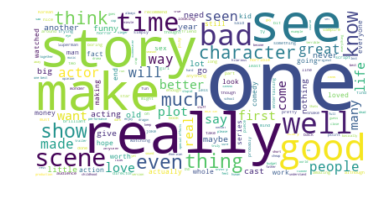

In [71]:
# Import the word cloud function  
from wordcloud import WordCloud

# Create and generate a word cloud image 
my_cloud = WordCloud(background_color='white', stopwords=my_stopwords).generate(descriptions)

# Display the generated wordcloud image
plt.imshow(my_cloud, interpolation='bilinear') 
plt.axis("off")

# Don't forget to show the final image
plt.show()